In [115]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

For this lab, **you can choose to work alone of in a group of up to four students**. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one GitHub repo (you can create one on github.ubc.ca and set the visibility to "public").

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/joeywwwu/573-lab4

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

The dataset from the UCI Machine Learning Repository focuses on the issue of customers' default payments. The dataset contains 30,000 instances and 23 features, including demographic information like gender, education, marital status, and age, as well as financial details like the amount of given credit, history of past payments, bill statement amounts, and previous payment amounts​

The dataset tackles the problem of predicting credit card default, a key issue for financial risk management. We find this dataset intriguing for its real-world application in risk assessment and its potential to refine predictive models. It challenges us to balance the nuances of individual financial behaviors with the broader patterns necessary for accurate default prediction, using advanced data science techniques.

In [28]:
import sklearn 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("./data/UCI_Credit_Card.csv")
df.rename(columns={"default.payment.next.month" : "target"}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [69]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

The summary statistics reveals significant diversity in credit behaviors among 30,000 clients, with a wide range in credit limits, bill amounts, and payment behaviors. Most clients appear to be consistent with their payments, as indicated by the repayment status fields, but there is a notable variance in payment amounts and behaviors. Approximately 22.12% of the clients are at risk of defaulting in the next month, as indicated by the target variable. This also indicate that we have a inbalance class in the target variable. The unique counts of variables shows a wide range of unique values across various financial attributes, reflecting the diversity of the client base. For example, there are 81 unique credit limits and 56 distinct age values, indicating varied client profiles.

As heatmap shown, there is a certain level of correlation between the PAY_0 to PAY_6 variables, indicating that past payment behavior is somewhat consistent over months. The bill amount variables (BILL_AMT1 to BILL_AMT6) also show moderate to high correlations with each other, suggesting that clients' bill amounts tend to be consistent over time. However, these bill amounts show little to moderate correlation with the PAY_X variables, indicating that higher bills do not necessarily correlate with delayed payments. However, we find that while there is some association between the amount billed and subsequent payment behavior, it's not a strong predictor. For example, higher bill amounts in June show a slight tendency towards delays in payment in July, but this relationship is not pronounced, suggesting other factors also play significant roles in determining payment behavior.

As countplot of the number of clients by sex and marriage status shown, there are more females(2) clients than males(1), but the proportion of defaults to non-defaults is similar between the two categories. The majority of clients are in categories married(1) and single(2), category unknown(0) and others(3) have significantly fewer clients. The proportion of defaults within each marriage category also appears to be relatively consistent, suggesting that marriage status may not be a strong standalone indicator of default risk.

In [23]:
df_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,14964.174292,167893.486667,1.603125,1.851958,1.553375,35.488458,-0.017542,-0.135292,-0.170042,-0.224292,...,43389.105625,40297.970375,38708.777542,5656.319917,5.910454e+03,5280.658708,4763.854250,4805.837667,5277.577958,0.222167
std,8660.479272,130109.666875,0.489260,0.790560,0.521452,9.217424,1.125331,1.199812,1.201709,1.170630,...,64572.844994,60878.153831,59355.284889,16757.718059,2.134743e+04,17973.951980,15162.056345,15251.828322,18222.046645,0.415711
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7467.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2310.000000,1744.250000,1200.000000,990.000000,8.150000e+02,390.000000,281.750000,234.000000,110.750000,0.000000
50%,14975.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19032.000000,18019.000000,16812.500000,2100.000000,2.010000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22460.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54591.500000,50237.250000,49132.750000,5009.000000,5.000000e+03,4600.000000,4026.000000,4009.250000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [25]:
df_train.nunique()

ID           24000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    18691
BILL_AMT2    18339
BILL_AMT3    18144
BILL_AMT4    17751
BILL_AMT5    17313
BILL_AMT6    16991
PAY_AMT1      6903
PAY_AMT2      6928
PAY_AMT3      6559
PAY_AMT4      6037
PAY_AMT5      6008
PAY_AMT6      6032
target           2
dtype: int64

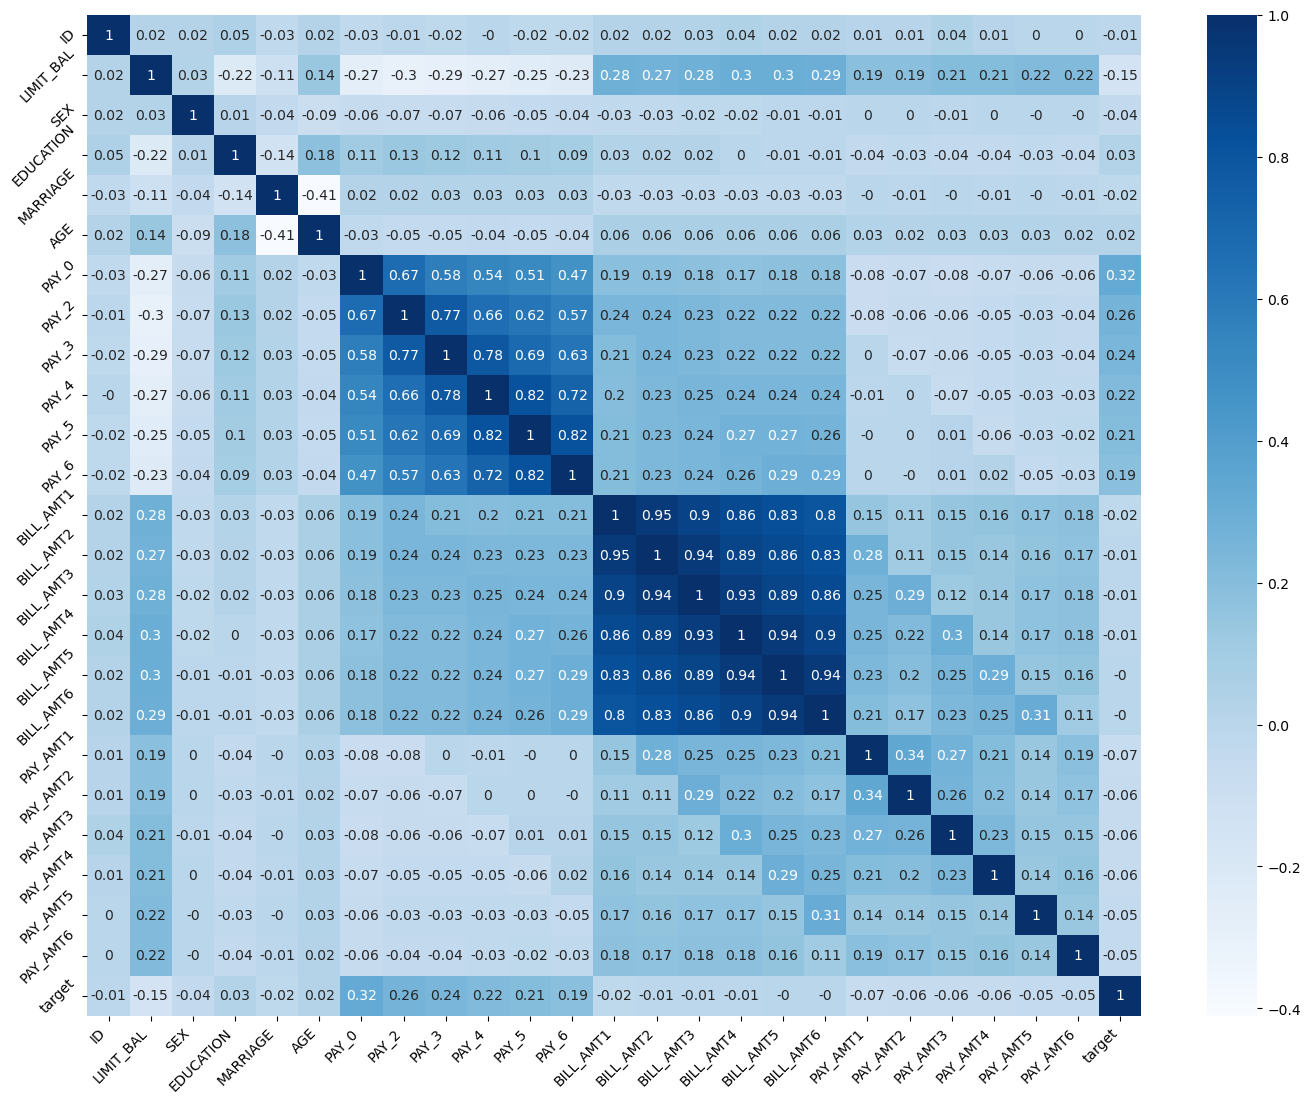

In [36]:
corr = df_train.corr().round(2)
plt.figure(figsize=(17, 13))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.show()

<Axes: xlabel='target', ylabel='count'>

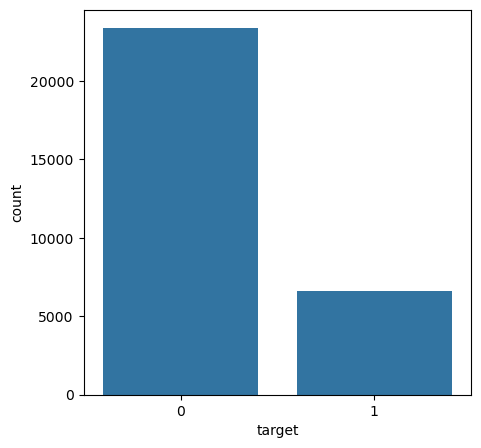

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'target', data = df)

<Axes: xlabel='SEX', ylabel='count'>

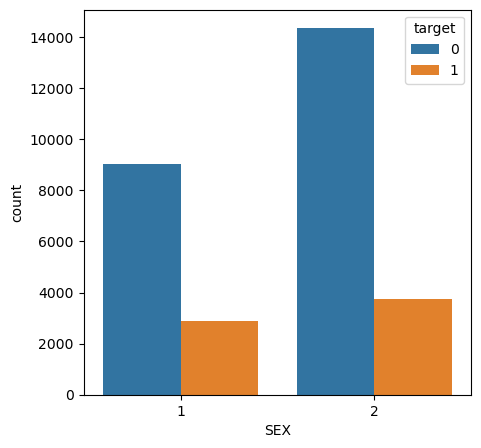

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'SEX', hue = 'target', data = df)

<Axes: xlabel='MARRIAGE', ylabel='count'>

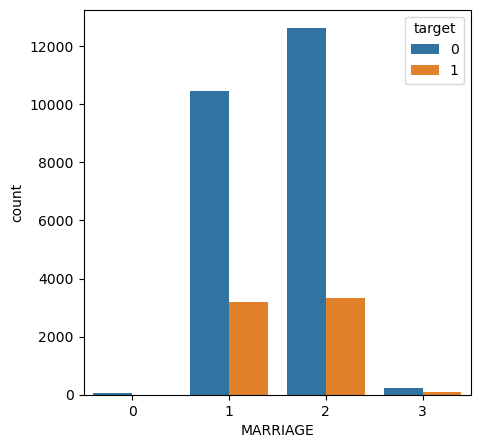

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'MARRIAGE', hue = 'target', data = df)

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In [57]:
df["total_pay"] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']
df["total_bill"] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']
df["account_balence"] = df["total_pay"] - df["total_bill"]

In [83]:
#resplit since we did feature engineering
X, y = df.drop("target", axis=1), df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
                                    StandardScaler,
                                    OneHotEncoder
)
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

In [73]:
df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].nunique()

BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
dtype: int64

In [70]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'target',
       'total_pay', 'total_bill', 'account_balence'],
      dtype='object')

In [104]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
drop_features = ['ID']
numeric_features = [
    'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
   'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
   'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
   'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
   'PAY_AMT6', 'total_pay', 'total_bill',
    'account_balence'
]
passthrough_features = []
text_feature = "text"

categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

numeric_transformer = StandardScaler()

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
    #("passthrough", passthrough_features)
)

preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'total_pay', 'total_bill',
                                  'account_balence']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('drop', 'drop', ['ID'])])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

The results indicate that baseline model makes predictions using simple rules. It has the mean test and train accuracy of approximately 77.8%. However, the precision, recall, and F1 scores for both the training and testing sets are all 0, suggesting that while the classifier can correctly identify the majority class, it fails entirely at identifying the minority class (likely the default cases), which is critical for imbalanced datasets like ours.

In [105]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (
                RandomForestClassifier,
                AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [106]:
classification_metrics = ["accuracy", "precision", "recall", "f1"]
# The dummy model
dc = DummyClassifier()

cross_val_results = {}
cross_val_results['dummy'] = pd.DataFrame(cross_validate(dc, X_train, y_train, scoring=classification_metrics, return_train_score=True)).agg(['mean', 'std']).round(3).T
cross_val_results['dummy']

C:\Users\thomas\miniconda3\envs\573\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thomas\miniconda3\envs\573\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thomas\miniconda3\envs\573\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thomas\miniconda3\envs\573\Lib\site-packages\sklearn\metrics\_classification

,mean,std
fit_time,0.053,0.093
score_time,0.038,0.009
test_accuracy,0.778,0.000
train_accuracy,0.778,0.000
test_precision,0.000,0.000
train_precision,0.000,0.000
test_recall,0.000,0.000
train_recall,0.000,0.000
test_f1,0.000,0.000
train_f1,0.000,0.000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

The Logistic Regression model has achieved a mean test accuracy of 80.9% and train accuracy of 81.0%, indicating that it performs consistently on both unseen and seen data. However, the precision is 71.7% which, while reasonably high, suggests that when the model predicts an instance to be a positive class (default), it is correct about 71.7% of the time. The recall is quite low at 23.3%, meaning it only correctly identifies 23.3% of all actual positive instances. The F1 score is at 35.1%, reflecting the model's struggle with correctly classifying the positive class (default cases) in the dataset. This suggests that while the model is fairly accurate overall, it is not as effective in identifying the more critical cases of default, which is typically a key objective in credit scoring models.

In [107]:
# The logreg model pipeline
logreg_m = LogisticRegression(max_iter=1000, random_state=123)
logreg = make_pipeline(preprocessor, logreg_m)

cross_val_results['logreg'] = pd.DataFrame(cross_validate(logreg, X_train, y_train, scoring=classification_metrics, return_train_score=True)).agg(['mean', 'std']).round(3).T
cross_val_results['logreg'] 

,mean,std
fit_time,1.783,0.195
score_time,0.069,0.013
test_accuracy,0.820,0.005
train_accuracy,0.822,0.001
test_precision,0.682,0.019
train_precision,0.690,0.005
test_recall,0.353,0.021
train_recall,0.358,0.005
test_f1,0.465,0.022
train_f1,0.471,0.005


In [108]:
param_dist = {
    "logisticregression__class_weight": [None, 'balanced'],
    "logisticregression__C": np.logspace(-7, 5, 20),
    "logisticregression__max_iter" : [100, 500, 1000, 1500, 2000]
}
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(random_state=123))
random_search = RandomizedSearchCV(
    logreg_pipe,
    param_dist,
    n_jobs=-1,
    n_iter=40,
    cv=5,
    scoring="f1",
    return_train_score=True,
    random_state=123
)

In [109]:
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_params

C:\Users\thomas\miniconda3\envs\573\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logisticregression__max_iter': 100,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__C': 23357.21469090121}

In [110]:
results = pd.DataFrame(random_search.cv_results_)
sorted_results = results.sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)
sorted_results.loc[:4,["param_logisticregression__C",
                       "param_logisticregression__max_iter",
                       "param_logisticregression__class_weight",
                       "mean_test_score",
                       "mean_fit_time",
                       "mean_train_score"]]

,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__class_weight,mean_test_score,mean_fit_time,mean_train_score
0,23357.214691,100,balanced,0.533836,2.379827,0.537457
1,0.885867,2000,balanced,0.533477,6.469004,0.537585
2,69.51928,2000,balanced,0.533349,19.912460,0.537777
3,0.206914,1500,balanced,0.533328,4.958939,0.537598
4,16.237767,2000,balanced,0.533301,12.802866,0.537662


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

Analyzing the results in terms of overfitting/underfitting:

- Support Vector Classifier (SVC): The SVC model shows a test accuracy very close to the training accuracy (81.9% vs. 82.3%), indicating a good fit to the data without significant overfitting. The difference between training and test performance is minimal, suggesting that the model generalizes well to unseen data.

- Random Forest: There's a more noticeable difference between training and test accuracy for the Random Forest model (84.3% vs. 81.9%). This indicates some overfitting, where the model performs better on the training data than on the unseen test data, although the difference is not extreme.

- AdaBoost: Similar to SVC, AdaBoost shows very little difference between its training and test accuracy (82.0% vs. 81.8%), which suggests that the model is neither overfitting nor underfitting significantly.

Considering fit and score times:

- SVC: It has the longest fit time (~21.16 seconds) and a moderate score time (~5.62 seconds). This could be an issue with larger datasets or in systems where rapid training and prediction are required.

- Random Forest: It has a much shorter fit time (~8.56 seconds) and the fastest score time (~0.07 seconds) among the three models. This makes Random Forest a more efficient choice for both training and scoring, although it does exhibit a slight tendency to overfit.

- AdaBoost: With a fit time (~8.43 seconds) comparable to Random Forest and a similarly fast score time (~0.09 seconds), AdaBoost offers a good balance between efficiency and performance. It stands out as a potentially robust model with a good fit to the data.

Comparing these models to the Logistic Regression model, which had an accuracy of approximately 81% and an F1 score of 35%, we see that the Logistic Regression model has similar accuracy but a lower F1 score than all three models. This suggests that while the Logistic Regression model is just as good at identifying the majority class, it is not as effective as the other models in correctly identifying the minority class (the defaults), which is crucial for predicting credit defaults. In particular, the Random Forest model shows a better balance between precision and recall, as reflected in its higher F1 score, which indicates a better performance in identifying the more challenging default cases.

In [111]:
#
svc_m = SVC(random_state=123)
svc = make_pipeline(preprocessor, svc_m)

cross_val_results['svc'] = pd.DataFrame(cross_validate(svc,
                                                       X_train,
                                                       y_train,
                                                       scoring=classification_metrics,
                                                       n_jobs=-1,
                                                       return_train_score=True)).agg(['mean', 'std']).round(3).T

cross_val_results['svc'] 

,mean,std
fit_time,90.620,3.071
score_time,20.974,0.786
test_accuracy,0.818,0.005
train_accuracy,0.822,0.001
test_precision,0.697,0.017
train_precision,0.714,0.007
test_recall,0.319,0.022
train_recall,0.333,0.003
test_f1,0.437,0.023
train_f1,0.454,0.002


In [116]:
random_forest_m = RandomForestClassifier(max_depth=8, random_state=123)
random_forest = make_pipeline(preprocessor, random_forest_m)
cross_val_results['random_forest'] = pd.DataFrame(cross_validate(random_forest,
                                                                 X_train,
                                                                 y_train,
                                                                 scoring=classification_metrics,
                                                                 n_jobs=-1,
                                                                 return_train_score=True)).agg(['mean', 'std']).round(3).T

cross_val_results['random_forest'] 

,mean,std
fit_time,6.847,0.099
score_time,0.146,0.006
test_accuracy,0.816,0.005
train_accuracy,0.834,0.002
test_precision,0.695,0.025
train_precision,0.781,0.007
test_recall,0.310,0.021
train_recall,0.352,0.010
test_f1,0.428,0.022
train_f1,0.485,0.011


In [112]:
ada_boost_m = AdaBoostClassifier(n_estimators=200, random_state=123)
ada_boost = make_pipeline(preprocessor, ada_boost_m)
cross_val_results['ada_boost'] = pd.DataFrame(cross_validate(ada_boost,
                                                             X_train,
                                                             y_train,
                                                             n_jobs=-1,
                                                             scoring=classification_metrics,
                                                             return_train_score=True)).agg(['mean', 'std']).round(3).T
cross_val_results['ada_boost'] 

,mean,std
fit_time,21.894,0.542
score_time,0.441,0.050
test_accuracy,0.817,0.005
train_accuracy,0.822,0.002
test_precision,0.669,0.024
train_precision,0.692,0.004
test_recall,0.345,0.014
train_recall,0.359,0.010
test_f1,0.456,0.016
train_f1,0.473,0.009


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward/backward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.  Briefly summarize your results.
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

We use random forest because f1 and recall is similar to other model while fitting time is less(you can expend on this)

In [141]:
param_dist_rf = {
    "randomforestclassifier__n_estimators": [10, 50, 100, 200],
    "randomforestclassifier__max_depth": [None, 5, 10, 15, 20],
    "randomforestclassifier__min_samples_split": [2, 5, 10, 20, 40],
    "randomforestclassifier__max_features": [None, 'sqrt', 'log2'],
    "randomforestclassifier__class_weight": [None, "balanced"]
}

random_forest_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

random_search_rf = RandomizedSearchCV(
    random_forest_pipe,
    param_dist_rf,
    n_jobs=-1,
    n_iter=40,  
    cv=3,      
    scoring="f1",  
    return_train_score=True,
    random_state=123
)

In [142]:
random_search_rf.fit(X_train, y_train)
random_search_rf.best_params_, random_search_rf.best_score_


({'randomforestclassifier__n_estimators': 50,
  'randomforestclassifier__min_samples_split': 20,
  'randomforestclassifier__max_features': 'log2',
  'randomforestclassifier__max_depth': 15,
  'randomforestclassifier__class_weight': 'balanced'},
 0.540998396338093)

In [143]:
results_rf = pd.DataFrame(random_search_rf.cv_results_)
sorted_results_rf = results_rf.sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)

# Select and rename the columns to display the top 5 results
top_results_rf = sorted_results_rf.loc[
    :4,
    [
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "param_randomforestclassifier__min_samples_split",
        "param_randomforestclassifier__max_features",
        "param_randomforestclassifier__class_weight",
        "mean_test_score",
        "mean_fit_time",
        "mean_train_score"
    ]
]
top_results_rf = top_results_rf.rename(
    columns={
        "param_randomforestclassifier__n_estimators": "N Estimators",
        "param_randomforestclassifier__max_depth": "Max Depth",
        "param_randomforestclassifier__min_samples_split": "Min Samples Split",
        "param_randomforestclassifier__max_features": "Max Features",
        "param_randomforestclassifier__class_weight": "Class Weight",
        "mean_test_score": "Mean Test Score",
        "mean_fit_time": "Mean Fit Time",
        "mean_train_score": "Mean Train Score"
    }
)

top_results_rf


,N Estimators,Max Depth,Min Samples Split,Max Features,Class Weight,Mean Test Score,Mean Fit Time,Mean Train Score
0,50,15,20,log2,balanced,0.540998,5.025302,0.677732
1,200,10,20,log2,balanced,0.540535,14.443531,0.602539
2,200,20,20,log2,balanced,0.540471,27.221342,0.739242
3,100,10,10,log2,balanced,0.539223,7.599482,0.613717
4,200,10,2,None,balanced,0.535357,196.246817,0.656666


In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [145]:
import shap

In [146]:
best_rf_model = random_search_rf.best_estimator_

In [149]:
X_test_transformed = best_rf_model.named_steps['columntransformer'].transform(X_test)
explainer = shap.TreeExplainer(best_rf_model.named_steps['randomforestclassifier'])

In [150]:
shap_values = explainer.shap_values(X_test_transformed)

In [172]:
best_rf_preprocessor = best_rf_model.named_steps['columntransformer']
feature_names = list(best_rf_preprocessor.named_transformers_['standardscaler'].get_feature_names_out()) + \
list(best_rf_preprocessor.named_transformers_['onehotencoder'].get_feature_names_out()) 

In [248]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test_transformed[0, :], feature_names=feature_names)

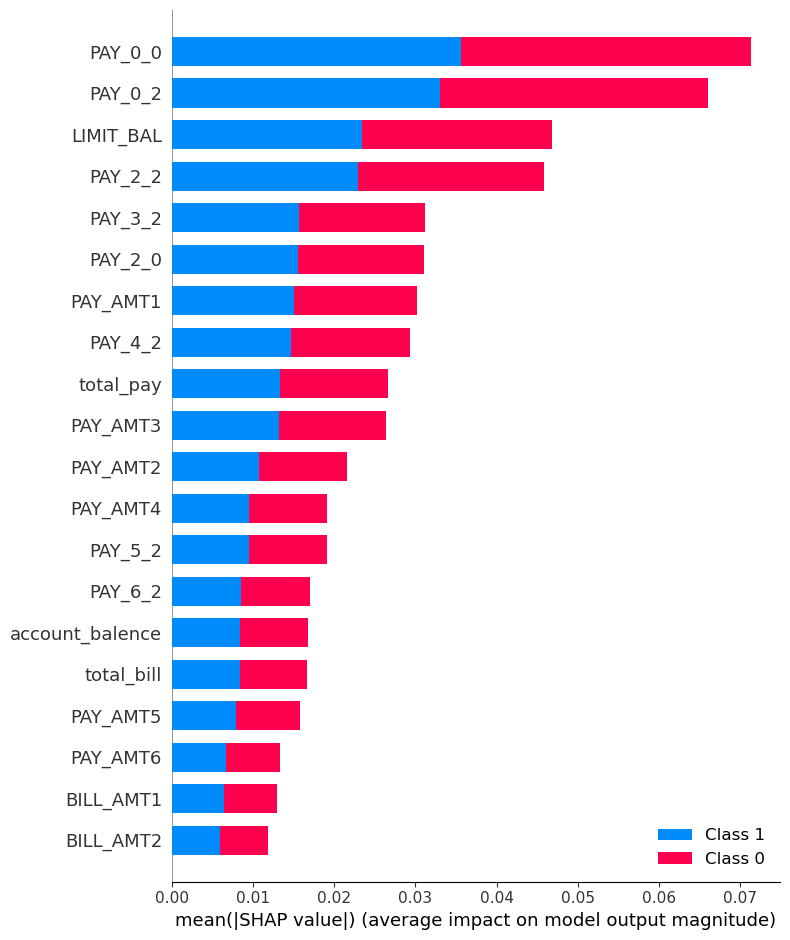

In [175]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

In [176]:
rf_feature_importances = best_rf_model.named_steps['randomforestclassifier'].feature_importances_

In [204]:
feature_importances_df = pd.DataFrame({'feature' : feature_names, 'importance' : rf_feature_importances})
top_feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False) \
    .head(10).sort_values(by='importance', ascending=True)

top_feature_importances_df

,feature,importance
15,total_bill,0.034486
67,PAY_4_2,0.034684
10,PAY_AMT3,0.035231
56,PAY_3_2,0.036118
14,total_pay,0.040584
8,PAY_AMT1,0.041586
0,LIMIT_BAL,0.045600
32,PAY_0_0,0.050620
45,PAY_2_2,0.053488
34,PAY_0_2,0.088564


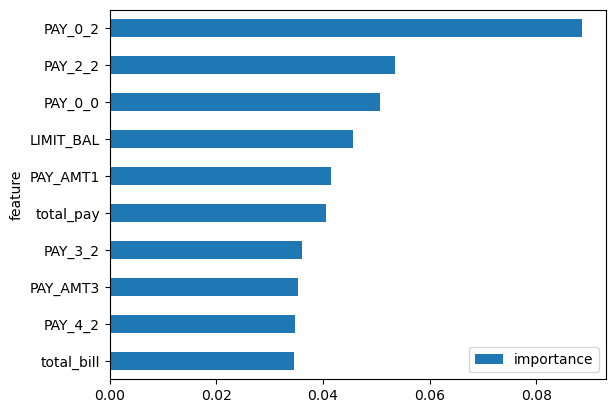

In [206]:
top_feature_importances_df.plot.barh(x="feature", y='importance', rot=0)
plt.show()

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [213]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, confusion_matrix, classification_report

In [207]:
best_rf_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=0)).set_params(**random_search_rf.best_params_)

In [214]:
best_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'total_pay', 'total_bill',
                                                   'account_balence']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6']),
                                                 ('drop', 'drop', ['ID'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        max_features='log2',
                                        min_samples_split=20, n_estimators=50,
                                        random_state=0))])

In [215]:
y_pred = best_rf_pipe.predict(X_test)

In [217]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[3993,  703],
       [ 549,  755]], dtype=int64)

In [218]:
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       0.88      0.85      0.86      4696
           1       0.52      0.58      0.55      1304

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.71      6000
weighted avg       0.80      0.79      0.80      6000



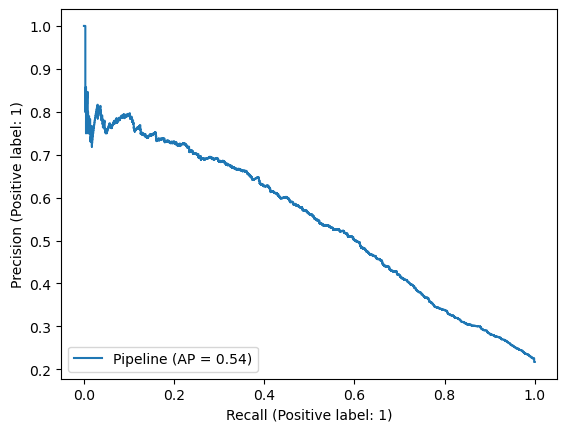

In [220]:
PrecisionRecallDisplay.from_estimator(best_rf_pipe, X_test, y_test)

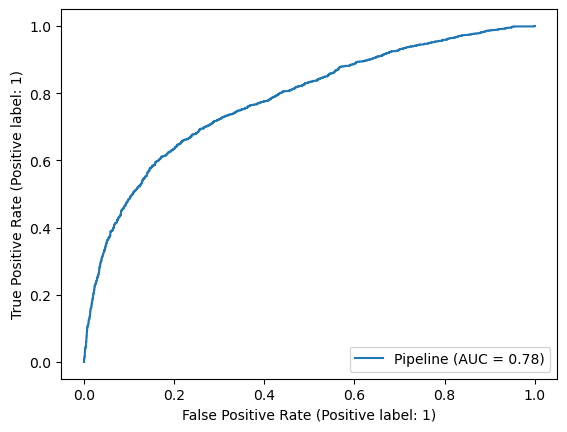

In [223]:
RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)

In [249]:
X_test[y_pred == 1][:3]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,total_pay,total_bill,account_balence
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0,32800.0,972809.0,-940009.0
19209,19210,210000.0,2,1,2,30,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,121,50000.0,1,3,2,37,2,2,2,3,...,51143.0,1000.0,4035.0,1000.0,1400.0,2800.0,0.0,10235.0,290245.0,-280010.0


In [230]:
y_test[y_pred == 1][:3]

22386    1
19209    0
120      1
Name: target, dtype: int64

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**

- Convert this notebook into scripts to create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: